In [2]:
# Import Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
df[['job_title_short', 'job_skills']].head()

# just looking at the 2 specified columns to see what we are working with

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [ ]:
df_exploded = df.explode('job_skills')

# creating a job_skills exploded data frame

In [ ]:
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size() # this makes a series

df_skills_count = skills_count.reset_index(name='skill_count')
# we want it to be a df. so, we reset the index and name the column that was the old index

df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)
# this just then sorts the columns in descending order to show the skills with the most count by job_title

df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


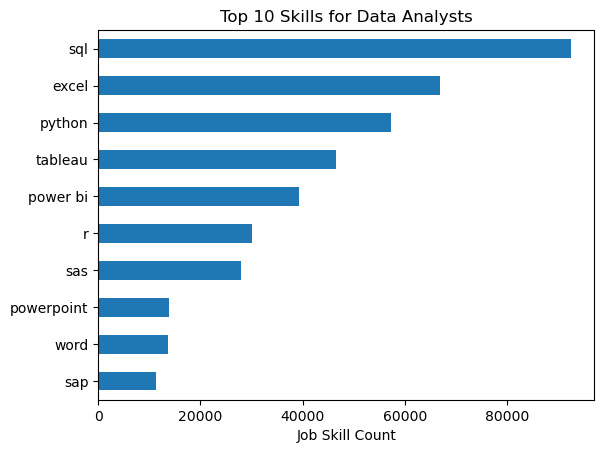

In [ ]:
job_title = 'Data Analyst'
top_skills = 10

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)

df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.gca().invert_yaxis()
plt.xlabel('Job Skill Count')
plt.ylabel('')
plt.title(f'Top {top_skills} Skills for {job_title}s')
plt.legend().set_visible(False)
plt.show()

# we used an f string in the title that way if we were to change the job_title or top_skills variables they will also update
# to what those variable have been assigned to and we don't have to go in and change them ourselves